<h1><center>Course-End Project: Employee Turnover Analytics</center></h1>

<h3> 1) Perform data quality check by checking for missing values if any. </h3>

Importing library Numpy, Pandas, Matplotlib, Seaborn, Sklearn

In [1068]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

<li> Reading dataset form csv file. </li>

In [1070]:
df = pd.read_csv('hr_comma_sep.csv')

#Printing first 5 row of dataset. 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [1071]:
#Getting stats on the dataset.
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<br><b>Observation:</b></br>
    <li>Average satisfaction level of employee is 0.612. </li>
    <li>Average last evaluation score of employee is 0.716 </li>
  
  

In [1073]:
#Checking the dtype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<br><b>Observation:</b></br>
<li>Dataset has 8 numerical and 2 categorial data. </li>
<li>There is 14999 records and 9 columns.</li>

In [1075]:
#Checking if there is any null value
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

<br><b>Observation:</b></br>
    <li>No null or missing value is any of the columns found.</li>
    <li>Deapartment or Sales and Salary are object type feature.</li>

<h3> 2) Understand what factors contributed most to employee turnover by EDA. </h3>

In [1078]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


To understand visual relationship between different features ploting pairplot

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


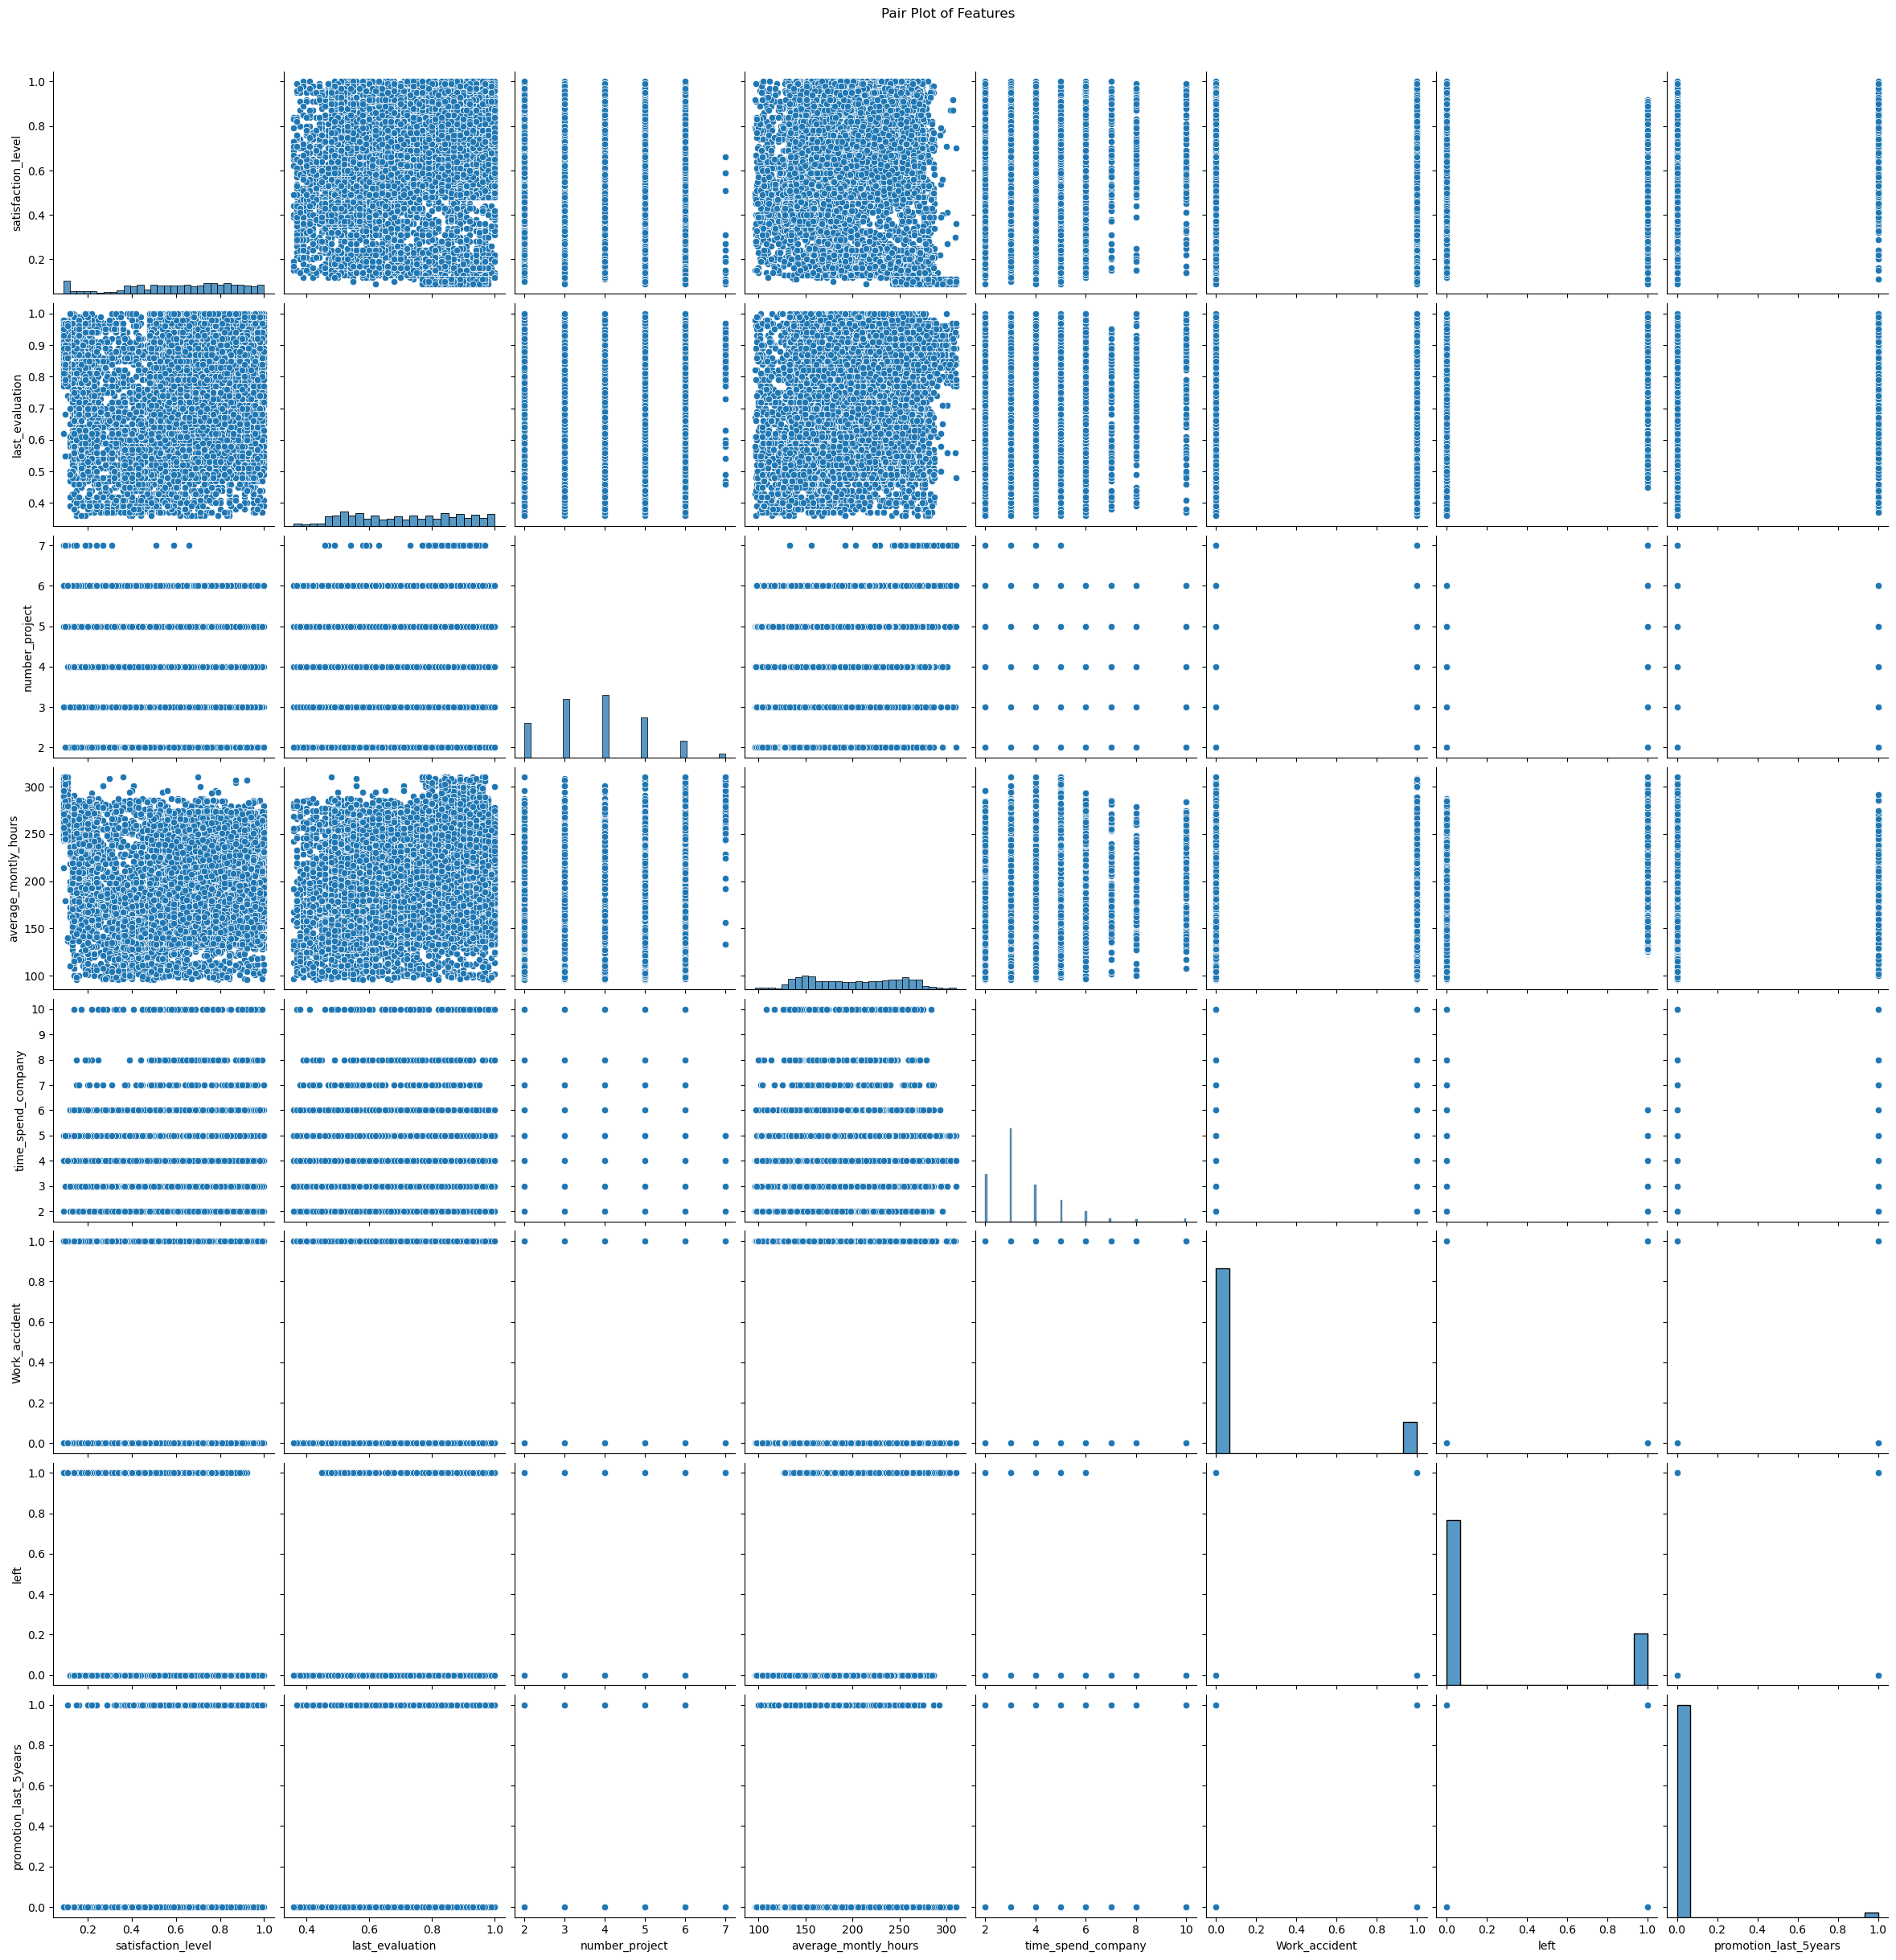

In [1080]:
import seaborn as sns
sns.pairplot(df, height=3)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

<h5><font color='blue'>Drawing a heatmap of the Correlation Matrix between all numerical features/columns in the data.</font color></h5>

In [1082]:
'''Filtering for only numeric column. If needed non numberic can also be converted into numberic using sklearn labelEncoder library. As question is for only numerical columns
so not transforming column from object to numberic.'''
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns

<Axes: >

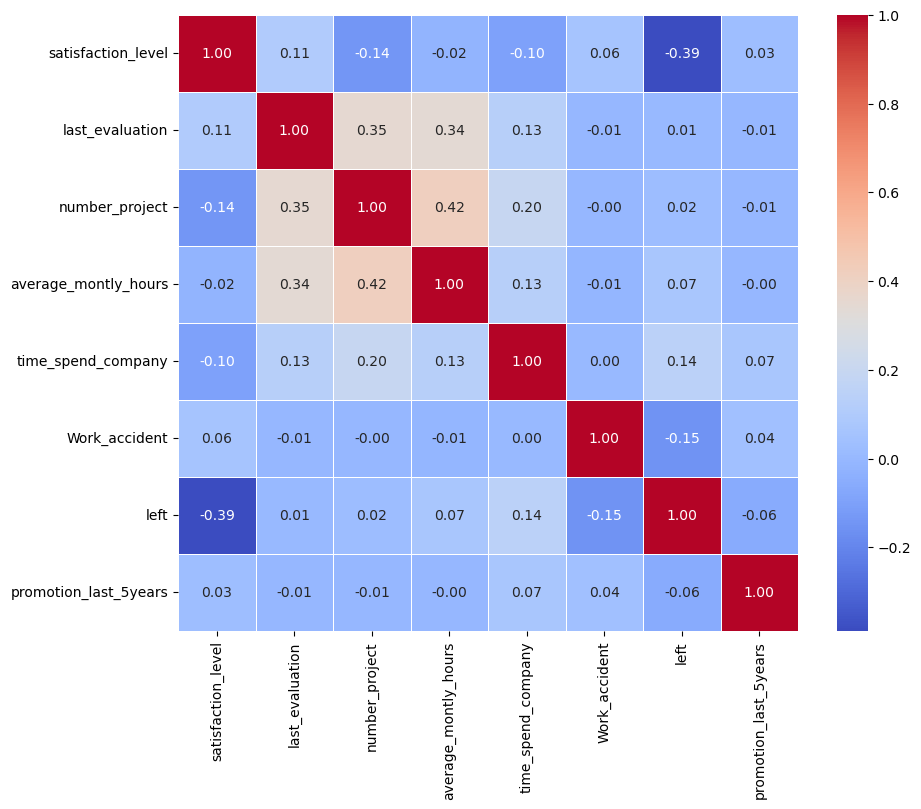

In [1083]:
corr = df[numeric_col].corr()
plt.figure(figsize=(10, 8))

#Creating heatmap of correlation matrix for all numberical column/feature. 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

<b style="color: green;font-size:20px;">Inference:</b>
<ol>
The correlation heatmap shows - 
<li> Moderate negative correlation (-0.39) between Employee 'Satisfaction Level' to Employee leaving the company. This means if lower the satisfaction level, the higher is the chance of employee leaving the company. </li> 
<li> Weak positive correlation (0.14) between Employee 'time spend in company' to Employee leaving the company. This means if higher the time spend in the company more chances of employee leaving the company. </li>
</ol>

In [1085]:
#Further finding the number of employees who fall into different salary bracket. 
df.groupby(['left', 'salary'])['left'].count()

left  salary
0     high      1155
      low       5144
      medium    5129
1     high        82
      low       2172
      medium    1317
Name: left, dtype: int64

<b style="color: green;font-size:15px;">Observation:</b>
<ol>
<li>Employees with low salary have left the company more than other salary level employee. </li> 

In [1087]:
#Finding count of employee left the company department wise. 
df.groupby(['left', 'sales'])['left'].count()

left  sales      
0     IT              954
      RandD           666
      accounting      563
      hr              524
      management      539
      marketing       655
      product_mng     704
      sales          3126
      support        1674
      technical      2023
1     IT              273
      RandD           121
      accounting      204
      hr              215
      management       91
      marketing       203
      product_mng     198
      sales          1014
      support         555
      technical       697
Name: left, dtype: int64

<b style="color: green;font-size:15px;">Observation:</b>
<ol>
<li>Sales followed by Techinal and Support are the departments from where employees have left most. </li> 
<li>Nearly 25% of Sales departments employees left the company. </li> 
</ol>

<h5><font color='blue'>Distribution plot for Employee Satisfaction </font color></h5>

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x1000 with 0 Axes>

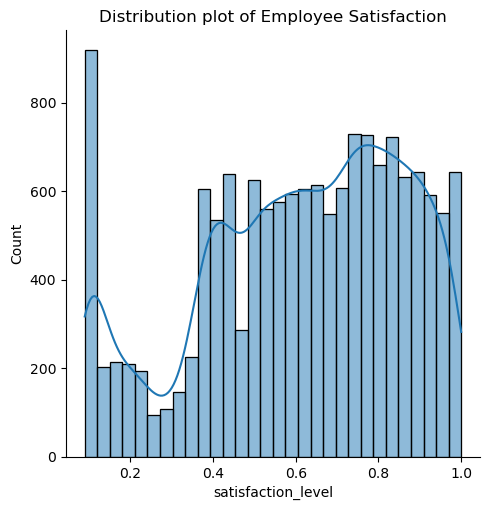

In [1090]:
#Distribution plot for Employee Satisfaction 
plt.figure(figsize=(8,10))
sns.displot(df, x=df['satisfaction_level'], kde=True)
plt.title("Distribution plot of Employee Satisfaction")
plt.show()

<h5><font color='blue'>Distribution plot for Employee Evaluation </font color></h5>

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x1000 with 0 Axes>

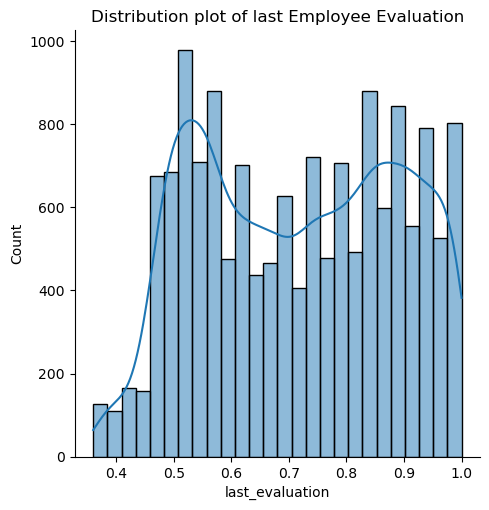

In [1092]:
#Distribution plot for Employee Evaluation
plt.figure(figsize=(8,10))
sns.displot(df, x=df['last_evaluation'], kde=True)
plt.title("Distribution plot of last Employee Evaluation")
plt.show()

<h5><font color='blue'>Distribution plot for Employee Average Monthly Hours </font color></h5>

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x1000 with 0 Axes>

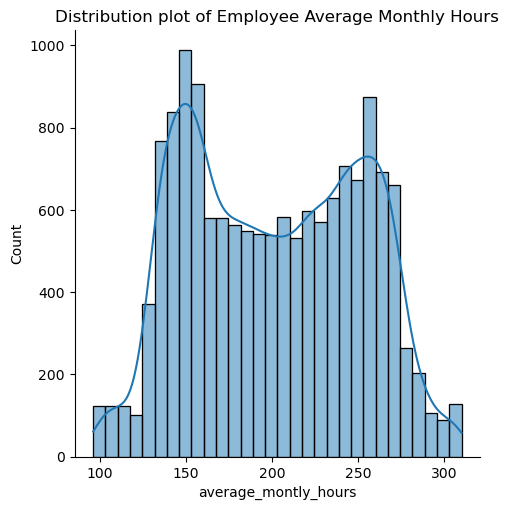

In [1094]:
#Distribution plot for Employee Average Monthly Hours
plt.figure(figsize=(8,10))
sns.displot(df, x=df['average_montly_hours'], kde=True)
plt.title("Distribution plot of Employee Average Monthly Hours")
plt.show()

<h5><font color='blue'>Distribution plot for Employee Average Monthly Hours based on employees left status </font color></h5>

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x1000 with 0 Axes>

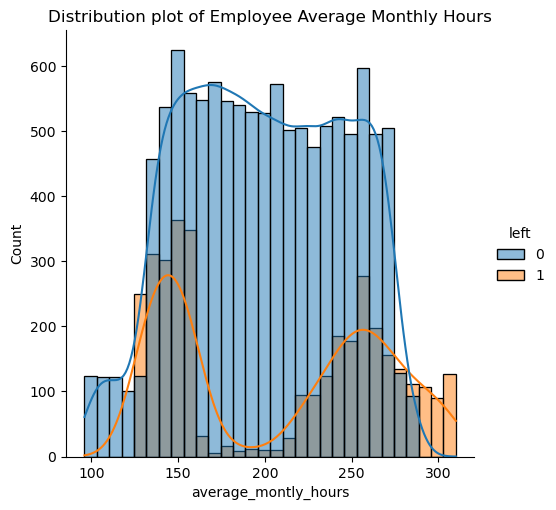

In [1096]:
#Distribution plot for Employee Average Monthly Hours based on employees left status. 
plt.figure(figsize=(8,10))
sns.displot(df, x=df['average_montly_hours'], hue='left', kde=True)
plt.title("Distribution plot of Employee Average Monthly Hours")
plt.show()

<b style="color: green;font-size:15px;">Observation:</b>
<ol>
<li>Among the Employees who have left the company, the count more of the employee whose average monthly hours were either too low (under-utilize) or too high (over-utilize) then mean.</li> 
</ol>

<h5><font color='blue'>Drawing the bar plot of Employee Project Count of both employees who left and who stayed in the organization</font color></h5>

Text(0.5, 1.0, "Plot of an employee count who 'Stayed' vs 'Left' project-count wise")

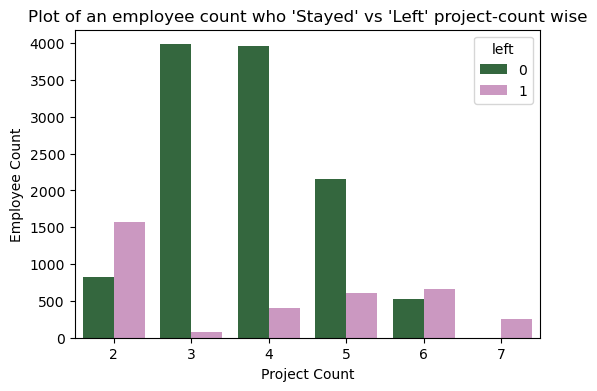

In [1099]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=df['number_project'], hue='left', palette='cubehelix')
plt.xlabel("Project Count")
plt.ylabel("Employee Count")
plt.title("Plot of an employee count who 'Stayed' vs 'Left' project-count wise")

<b style="color: green;font-size:20px;">Inference:</b>
<ol>
<li>Employee who are invloved in 2 projects have left the organization the most. </li>
<li>Almost all the employees involved in 7 project, left the organization. </li>
<li>Majority of the employees staying in the organization are involved in 3 or 4 projects. </li>
</ol>

<h3> 3) Perform clustering of Employees who left based on their satisfaction and evaluation.</h3>

In [1102]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [1103]:
#Filtering. Selecting employees who have left the organization
df_leftCompany = df[df['left'] == 1]
print("Employees count who have left the organization:", df_leftCompany['left'].count())

Employees count who have left the organization: 3571


In [1104]:
X = df_leftCompany[['satisfaction_level', 'last_evaluation']].values
X[:5]

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       [0.72, 0.87],
       [0.37, 0.52]])

<b>Finding Elbow point. </b>
Choosing the value k at Elbow point, we can balance between cluster quality and simplicity, resulting in a reasonable number of clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

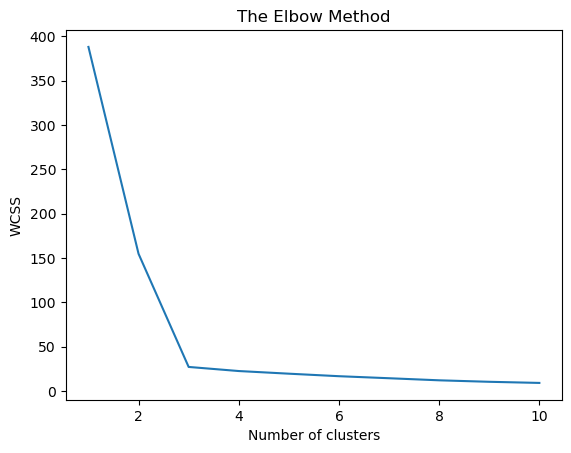

In [1106]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<b>From Elbow point graph, the choosen value of k is 3</b>

<h5><font color='blue'>Creating cluster with KMeans algorithm using k value as 3 </font color><h5>

In [1108]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


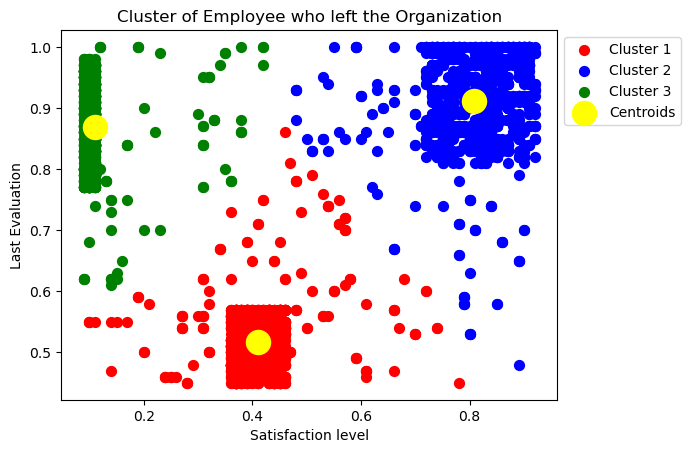

In [1109]:
#Plotting cluster 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Employee who left the Organization')
plt.xlabel('Satisfaction level')
plt.ylabel('Last Evaluation')
unique_elements, counts = np.unique(y_kmeans, return_counts=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<b style="color: green;font-size:20px;">Inference:</b>
<ol>
<li>Employees who have left the Organization can clustered into 3 groups.</li>
<li>Employee whose satifaction level is low are the most who have left the organization. </li>
<li>There are good number of Employee whose satifaction level and last evaluation level are high but they still left the organization (represented by blue cluster 2). </li>
</ol>

In [1111]:
#Number of employees in each cluster.
unique_elements, counts = np.unique(y_kmeans, return_counts=True)
print(f'\033[1m Left Employee count in cluster 1(Red):{counts[0]}, Cluster 2(Blue): {counts[1]}, Cluster 3(Green): {counts[2]} \033[0m')

 Left Employee count in cluster 1(Red):1650, Cluster 2(Blue): 977, Cluster 3(Green): 944 


<h3>4) Handle the left Class Imbalance using SMOTE technique.</h3>

<h5><font color='blue'>Separating categorical variables and numeric variables.</font color></h5>

In [1114]:
#Creating different dataframe for categorical and numrical data-types. 
df_categorical = df[df.select_dtypes(include=['object']).columns]
df_numeric = df[df.select_dtypes(include=['float64', 'int64']).columns]

In [1115]:
#First 5 row of categorical data-frame
df_categorical.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [1116]:
#First 5 row of numerical data-frame
df_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


<h5><font color='blue'>Applying get_dummies() to the categorical variables.</font color></h5>

In [1118]:
#Applying get_dummies to categorical columns. 
df_categorical = pd.get_dummies(df_categorical)
#listing first 5 rows after applying get_dummies to categorical columns
df_categorical.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False


<h5><font color='blue'>Combining categorical variables and numeric variables.</font color></h5>

In [1120]:
#Combining numerical and categorical columns after applying dummies. 
df_new = pd.concat([df_numeric, df_categorical], axis=1)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


In [1121]:
print("Shape of original dataframe", df.shape)
print("Shape of new dataframe after segregating the categorical columns", df_new.shape)

Shape of original dataframe (14999, 10)
Shape of new dataframe after segregating the categorical columns (14999, 21)


<h5><font color='blue'>Doing the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123</font color></h5>

In [1123]:
#Selecting column 'left' as target. 
#Reason: Based on all the features, the prediction will be to find whether the employee will stay with the organization or will leave. 
X = df_new.drop(['left'], axis=1)
y = df['left']

In [1124]:
#Printing first 5 rows of input dataset
X[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [1125]:
#Printing first 5 rows of target dataset
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [1126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
# Printing the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11999, 20)
X_test shape: (3000, 20)
y_train shape: (11999,)
y_test shape: (3000,)


<h5><font color='blue'>Upsampling the train dataset using SMOTE technique from the imblearn module.</font color></h5>

In [1128]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
upscaled_X_train, upscaled_y_train = oversample.fit_resample(X_train, y_train)

In [1129]:
print(f' old X_train dataset shape: {X_train.shape} \n old y_train dataset shape :{y_train.shape}')
print()
print(f' new X_train dataset shape: {upscaled_X_train.shape} \n new y_train dataset shape :{upscaled_y_train.shape}')

 old X_train dataset shape: (11999, 20) 
 old y_train dataset shape :(11999,)

 new X_train dataset shape: (18284, 20) 
 new y_train dataset shape :(18284,)


<h3> 5) Perform 5-Fold cross-validation model training and evaluate performance </h3>

In [1131]:
#importing all sklearn library 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

<h5><font color="blue">Training a Logistic Regression model and applying a 5-Fold CV and plotting the classification report</font color></h5>

In [1133]:
# Initialize the model
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
logistic_regression_model = lr.fit(upscaled_X_train, np.ravel(upscaled_y_train))
# Define the 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform 5-Fold CV
cv_scores = cross_val_score(logistic_regression_model, upscaled_X_train, upscaled_y_train, cv=kf)

In [1134]:
print(cv_scores)
print("\n\033[1m Avg CV Score for Logistic Regression: \033[0m",np.average(cv_scores))

[0.79546076 0.81186765 0.79491386 0.8042111  0.81181619]

 Avg CV Score for Logistic Regression:  0.8036539139290435



 Classification Report for Logistic Regression Classification: 
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      2286
           1       0.52      0.71      0.60       714

    accuracy                           0.78      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.81      0.78      0.79      3000



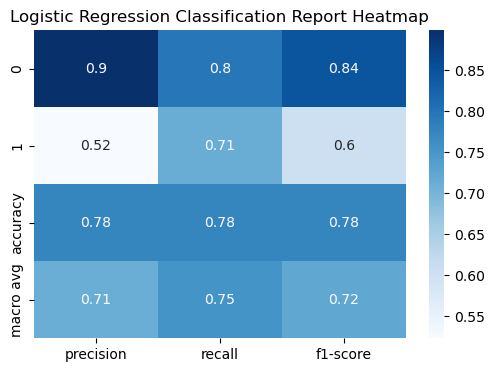

In [1135]:
y_pred = logistic_regression_model.predict(X_test)
print("\n\033[1m Classification Report for Logistic Regression Classification: \033[0m")
print(classification_report(y_test,y_pred))
# Converting the classification report to a dictionary for plotting
report = classification_report(y_test,y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
# Classification report ploting
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Logistic Regression Classification Report Heatmap')
plt.show()

<b style="color: green;font-size:20px;">Inference:</b>
<ol>
<li>Using Logistic Regression Classification model, the precision for class stayed in company is 0.9 while who left the company is 0.53.</li>
<li>Using Logistic Regression Classification model, the recall for class stayed in company is 0.82 while who left the company is 0.72. </li>
<li>Model performance is average, should try to improve.</li>
</ol>

<h5><font color="blue">Training a Random Forest Classifier model and applying a 5-Fold CV and plotting the classification report</font color></h5>

In [1138]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_classifier_model = classifier.fit(upscaled_X_train, upscaled_y_train)
# Define the 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform 5-Fold CV
cv_scores = cross_val_score(random_forest_classifier_model, upscaled_X_train, upscaled_y_train, cv=kf)

In [1139]:
print(cv_scores)
print("\n\033[1m Avg CV Score for Random Forest Classifier: \033[0m",np.average(cv_scores))

[0.9852338  0.98605414 0.98414001 0.98140552 0.98577681]

 Avg CV Score for Random Forest Classifier:  0.984522055061813



 Classification Report for Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



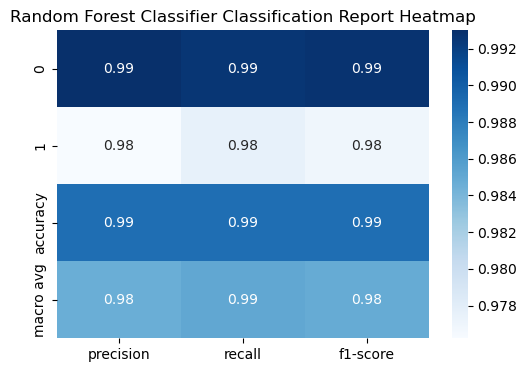

In [1140]:
y_pred = random_forest_classifier_model.predict(X_test)
print("\n\033[1m Classification Report for Random Forest Classifier: \033[0m")
print(classification_report(y_test,y_pred))
# Converting the classification report to a dictionary
report = classification_report(y_test,y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
# Classification report ploting
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Random Forest Classifier Classification Report Heatmap')
plt.show()

<b style="color: green;font-size:20px;">Inference:</b>
<ol>
<li>Using Random Forest Classifier model, the precision for class stayed in company is 0.99 while who left the company is 0.98.</li>
<li>Using Random Forest Classifier model, the recall for class stayed in company is 0.99 while who left the company is 0.98. </li>
<li>Model performance is very good, certainly better than Logistic Regression Classification, very close to accurate.</li>
</ol>

<h5><font color="blue">Training a Gradient Boosting Classifier model and applying a 5-Fold CV and plotting the classification report</font color></h5>

In [1143]:
classifier = GradientBoostingClassifier()
gradient_boosting_classifier_model = classifier.fit(upscaled_X_train, upscaled_y_train)
# Define the 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform 5-Fold CV
cv_scores = cross_val_score(gradient_boosting_classifier_model, upscaled_X_train, upscaled_y_train, cv=kf)

In [1144]:
print(cv_scores)
print("\n\033[1m Avg CV Score for Gradient Boosting Classifier: \033[0m",np.average(cv_scores))

[0.95652174 0.96335794 0.9693738  0.96062346 0.96033917]

 Avg CV Score for Gradient Boosting Classifier:  0.9620432233616893



 Classification Report for Gradient Boosting Classifier: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.96      0.97      3000



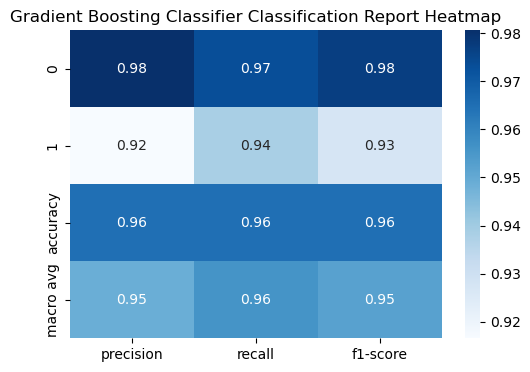

In [1145]:
y_pred = gradient_boosting_classifier_model.predict(X_test)
print("\n\033[1m Classification Report for Gradient Boosting Classifier: \033[0m")
print(classification_report(y_test,y_pred))
# Converting the classification report to a dictionary
report = classification_report(y_test,y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
# Classification report ploting
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Gradient Boosting Classifier Classification Report Heatmap')
plt.show()

<b style="color: green;font-size:20px;">Inference:</b>
<ol>
<li>Using Gradient Boosting Classifier model, the precision for class stayed in company is 0.98 while who left the company is 0.92.</li>
<li>Using Gradient Boosting Classifier model, the recall for class stayed in company is 0.97 while who left the company is 0.93. </li>
<li>Model performance is very good, certainly better than Logistic Regression Classification but not better than Random Forest Classifier.</li>
</ol>

<h3>6. Identify the best model and justify the evaluation metrics used. </h3>

<h5><font color="blue">For Logistic Regression Model finding ROC/AUC, plotting ROC curve, listing classification and confusion matrix and the inference.</font color></h5>

In [1149]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


 Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      2286
           1       0.52      0.71      0.60       714

    accuracy                           0.78      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.81      0.78      0.79      3000






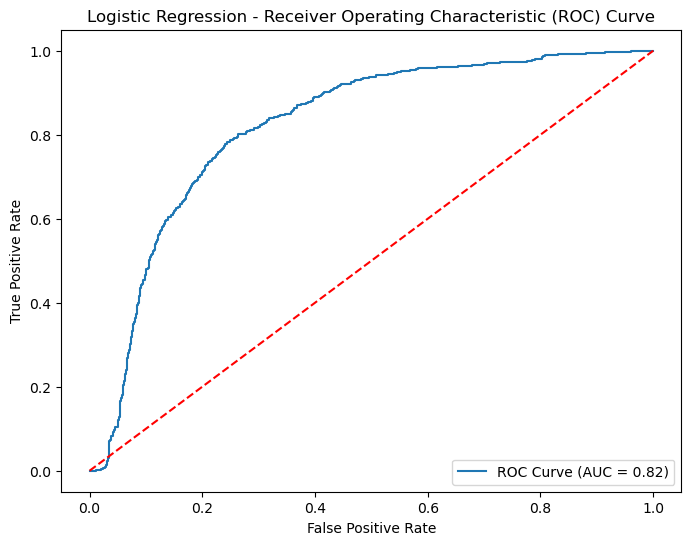



 Confusion matrix for Logistic Regression: 
 [[1822  464]
 [ 205  509]]


In [1150]:
# Create and train the logistic regression model
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
logistic_regression_model = lr.fit(upscaled_X_train, upscaled_y_train)

# Predict the labels for the test set
lr_y_pred = logistic_regression_model.predict(X_test)

# Classification Report
report = classification_report(y_test, lr_y_pred)
print("\n\033[1m Classification Report for Logistic Regression: \033[0m")
print(report)

# ROC Curve
proba = logistic_regression_model.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
print("\n\n")
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("\n\n\033[1m Confusion matrix for Logistic Regression: \033[0m\n", confusion_matrix(y_test,lr_y_pred))

<b style="color: green;font-size:20px;">Inference:</b>
<li>The AUC value is 0.82 for logistic regression. This shows model is perfroming good since AUC value is near 1.</li>
<li>Out of 3000 prediction, right prediction are 2341 and mis-prediction are 659. FP (False Positive) case are critical. Cost of not predicting the employees who will leaves the company correctly will be a impact to the company so, focus should be to improve precision performance metric here. </li>

<h5><font color="blue">For Random Forest Classifier Model finding ROC/AUC, plotting ROC curve, listing classification and confusion matrix and the inference.</font color></h5>



 Random Forest Classification Report: 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



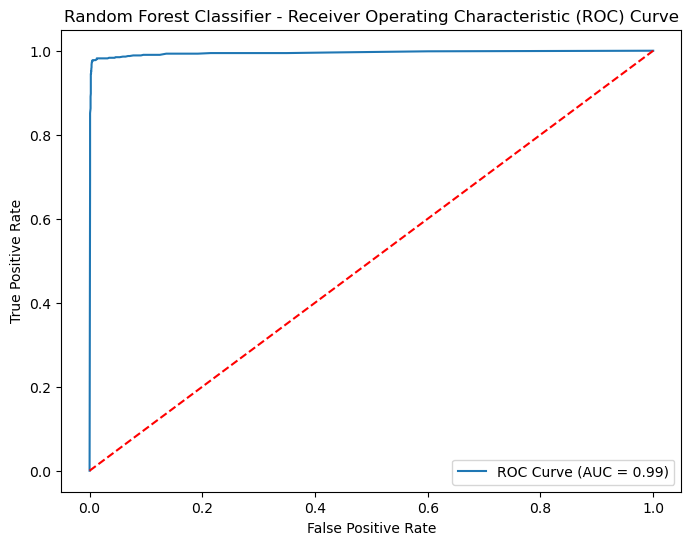



 Confusion matrix for Random Forest Classifier 

 
 [[2269   17]
 [  16  698]]


In [1153]:
# Creating and train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_classifier_model = classifier.fit(upscaled_X_train, upscaled_y_train)

# Predict the labels for the test set
rfc_y_pred = random_forest_classifier_model.predict(X_test)

# Classification Report
report = classification_report(y_test, rfc_y_pred)
print("\n\n\033[1m Random Forest Classification Report: \n\n\033[0m")
print(report)

# ROC Curve
proba = random_forest_classifier_model.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier - Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("\n\n\033[1m Confusion matrix for Random Forest Classifier \n\n\033[0m \n", confusion_matrix(y_test,rfc_y_pred))

<b style="color: green;font-size:20px;">Inference:</b>
<li>The AUC value is 1 for Random Forest Classifier. This shows model is perfroming very accurately.</li>
<li>Out of 3000 prediction, right predictions are 2967 and mis-prediction are 33. FP (False Positive) case are critical. Cost of not predicting the employees who will leaves the company correctly will be a impact to the company so, focus should be to improve precision performance metric here. </li>

<h5><font color="blue">For Gradient Boosting Classifier Model finding ROC/AUC, plotting ROC curve, listing classification and confusion matrix and the inference.</font color></h5>

 Gradient Boosting Classifier - Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.96      0.97      3000



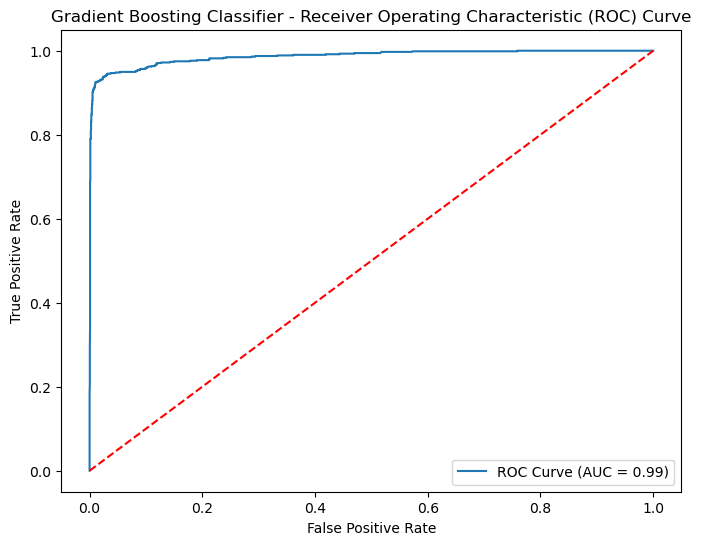

 Confusion matrix for Gradient Boosting Classifier  
 [[2225   61]
 [  44  670]]


In [1156]:
# Creating and train the Gradient Boosting Classifier
classifier = GradientBoostingClassifier()
gradient_boosting_classifier_model = classifier.fit(upscaled_X_train, upscaled_y_train)

# Predict the labels for the test set
gbc_y_pred = gradient_boosting_classifier_model.predict(X_test)

# Classification Report
report = classification_report(y_test, gbc_y_pred)
print("\033[1m Gradient Boosting Classifier - Classification Report: \033[0m")
print(report)

# ROC Curve
proba = gradient_boosting_classifier_model.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting Classifier - Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("\033[1m Confusion matrix for Gradient Boosting Classifier \033[0m \n", confusion_matrix(y_test,gbc_y_pred))

<b style="color: green;font-size:20px;">Inference:</b>
<li>The AUC value is 0.99 for Gradient Boosting Classifier. This shows model is perfroming very accurately.</li>
<li>Out of 3000 prediction, right predictions are 2895 and mis-prediction are 105. FP (False Positive) case are critical. Cost of not predicting the employees who will leaves the company correctly will be a impact to the company so, focus should be to improve precision performance metric here. </li>

<h5><font color="green">Of all the models used above, Random Forest Classifier model has best precision matrix.</font color></h5>

<h3>7. Suggest various retention strategies for targeted employees.</h3>

<h5><font color='blue'>Predicting the probability of employee turnover in the test data</font color></h5>

In [1217]:
# Creating and train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_classifier_model = classifier.fit(upscaled_X_train, upscaled_y_train)

#Predicting probability of the employee turnover or employee leaving the company in test data
proba = random_forest_classifier_model.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
prediction_probability = {'Employee_Turnover_Predicted_Probability': proba_class1}
df_etp = pd.DataFrame(prediction_probability, index=X_test.index)
X_test= pd.concat([X_test, df_etp], axis=1)
print("\033[1m predict the probability of employee turnover in the test data. \033[0m")
X_test['Employee_Turnover_Predicted_Probability']

 predict the probability of employee turnover in the test data. 


10627    0.00
2703     0.58
6059     0.04
3258     0.01
4565     0.02
         ... 
4961     0.01
4557     0.03
6610     0.05
10327    0.01
731      1.00
Name: Employee_Turnover_Predicted_Probability, Length: 3000, dtype: float64

<h5><font color='blue'>Based on probability score range, categorizing the employees into four employee turnover zones</font color></h5>

In [1219]:
# Getting probabilities for the positive class (class 1)
probs_class_1 = proba[:, 1]

# Define the zones boundary
zones = np.digitize(probs_class_1, bins=[0.2, 0.6, 0.9])

# Create a mapping for the zones
zone_labels = {0: 'Safe Zone (<20%)', 1: 'Low Risk Zone (20-60%)', 2: 'Medium Risk Zone (60-90%)', 3: 'High Risk Zone (>90%)'}
zone_categories = [zone_labels[zone] for zone in zones]

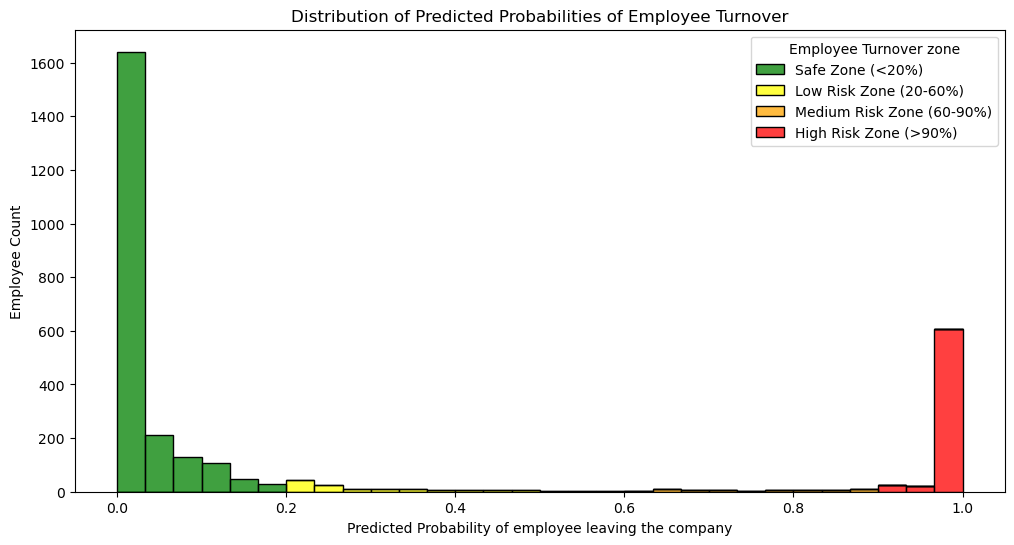

In [1221]:
# Dataframe creation for better visualization
zone_df = pd.DataFrame({'Probabilities': probs_class_1, 'Employee Turnover zone': zone_categories})

# Define a custom palette
custom_palette = {
    'Safe Zone (<20%)': 'green',
    'Low Risk Zone (20-60%)': 'yellow',
    'Medium Risk Zone (60-90%)': 'orange',
    'High Risk Zone (>90%)': 'red'
}
hue_order = ['Safe Zone (<20%)', 'Low Risk Zone (20-60%)', 'Medium Risk Zone (60-90%)', 'High Risk Zone (>90%)']

# Plot the distribution based on zones 
plt.figure(figsize=(12, 6))
sns.histplot(data=zone_df, x='Probabilities', hue='Employee Turnover zone', palette=custom_palette, multiple='stack', bins=30, hue_order=hue_order)
plt.title('Distribution of Predicted Probabilities of Employee Turnover')
plt.xlabel('Predicted Probability of employee leaving the company')
plt.ylabel('Employee Count')
plt.show()

<b style="color: green;font-size:20px;">Inference:</b>
<li>Majority of the employee are in safe zone followed by high risk zone</li>
<br></br>
<b>Based on data analysis of Portobello Tech company, following observation was found on Employee Turnover: </b>
<ol>
<li>Employees with lower satisfaction level has higher chances of leaving the company compared to other groups. </li>
<li>Employees whose Last Evaluation score was lower, have higher chances of leaving compared to other groups. </li>
<li>Employees who have spend more time in the company are leaving the company more compared to who are new to the company. </li>
<li>Employees who are not getting the chance to work on multiple projects are having higher chances of leaving the company. </li>
<li>Employee with low salary left the company more. </li>
<li>Employee how have spent significantly less or significantly more than average monthly hours have left than the company more. </li>
<li>Nearly 25% of the employee from sales department have left the company, followed by technical and support department. </li>
</ol>

<b>Recommended Retention Strategy: </b>
<ol>
<li>Providing more opportunity to employee to work on multiple project can help in their retention. </li>
<li>Employees who have spend more time in the same project or in same role and have lower satisfication score, see if they can be provided with oppoutunity to change projects or take different or bigger role in the company.</li>
<li>HR and Manager should reach out to the employees who are at high risk zone of leaving the company and try to understand and address their concern, if possible. Also get more regular feedback from these high risk employees to see if their satisfaction level improves over course of time. To boost their chance of staying in the company options like Salary improvement, Rewards and Recongition, Training and more engagements programs can be planned.</li>
<li>See if employee is not spending too low (under-utilize) or too high (burn-out) hours at work. </li>    
<li>Have focused strategy to boost retention of employees from deparments like Sales, Technical and Support, since most of the employees are leaving from these departments. Salary improvement, Rewards and Recongition, Training and more engagements programs for these department can be planned for these departments.</li>    
</ol>
